In [2]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
reward_file = open('reward_records.txt','r')
rewards = reward_file.read().splitlines()
rewards = [float(item) for item in rewards]

step_file = open('step_records.txt','r')
steps = step_file.read().splitlines()
steps = [float(item) for item in steps]

In [13]:
mean_reward = [np.mean(rewards[max(i-100,0):i]) for i in range(1, len(rewards)+1)]
mean_step = [np.mean(steps[max(i-100,0):i]) for i in range(1, len(steps)+1)]

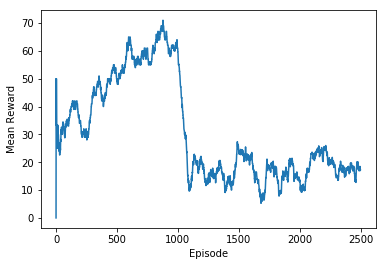

In [17]:
plt.plot(mean_reward)
plt.xlabel('Episode')
plt.ylabel('Mean Reward')
plt.savefig('Mean Reward.png', dpi=1000)

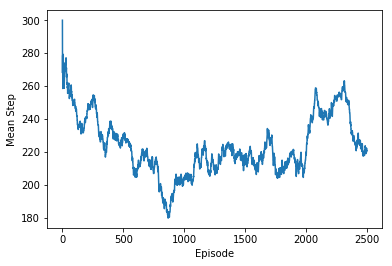

In [18]:
plt.plot(mean_step)
plt.xlabel('Episode')
plt.ylabel('Mean Step')
plt.savefig('Mean Step.png', dpi=1000)